In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [4]:
cps_summary = pd.DataFrame()
cps_summary = pd.read_csv("csv's/CPS_Summary.csv")

bpcps_summary = pd.DataFrame()
bpcps_summary = pd.read_csv("csv's/BPCPS_Summary.csv")

ppcps_summary = pd.DataFrame()
ppcps_summary = pd.read_csv("csv's/PPCPS_Summary.csv")

ppbps_summary = pd.DataFrame()
ppbps_summary = pd.read_csv("csv's/PPBPS_Summary.csv")

# Using CPS

## Top 5 categories by maximum CPS value

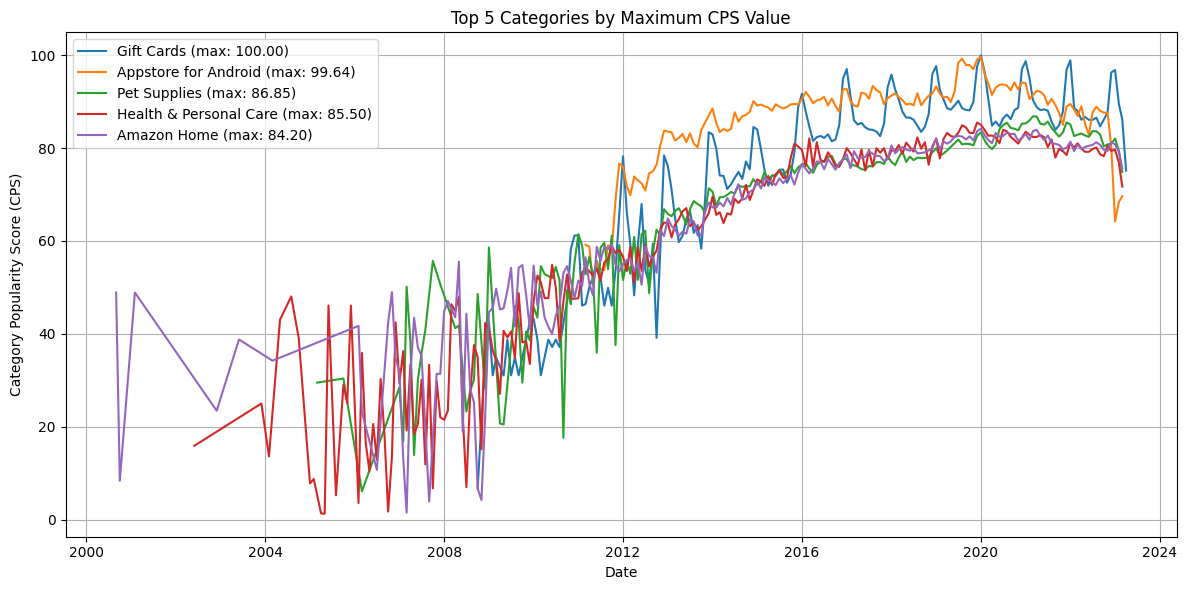

In [5]:
max_cps_by_category = cps_summary.groupby('category')['CPS scaled'].max().sort_values(ascending=False)
top_categories = max_cps_by_category.head(5).index.tolist()

plt.figure(figsize=(12, 6))
for category in top_categories:
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    plt.plot(category_subset['date'], category_subset['CPS scaled'], label=f"{category} (max: {max_cps_by_category[category]:.2f})")

plt.xlabel('Date')
plt.ylabel('Category Popularity Score (CPS)')
plt.title('Top 5 Categories by Maximum CPS Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

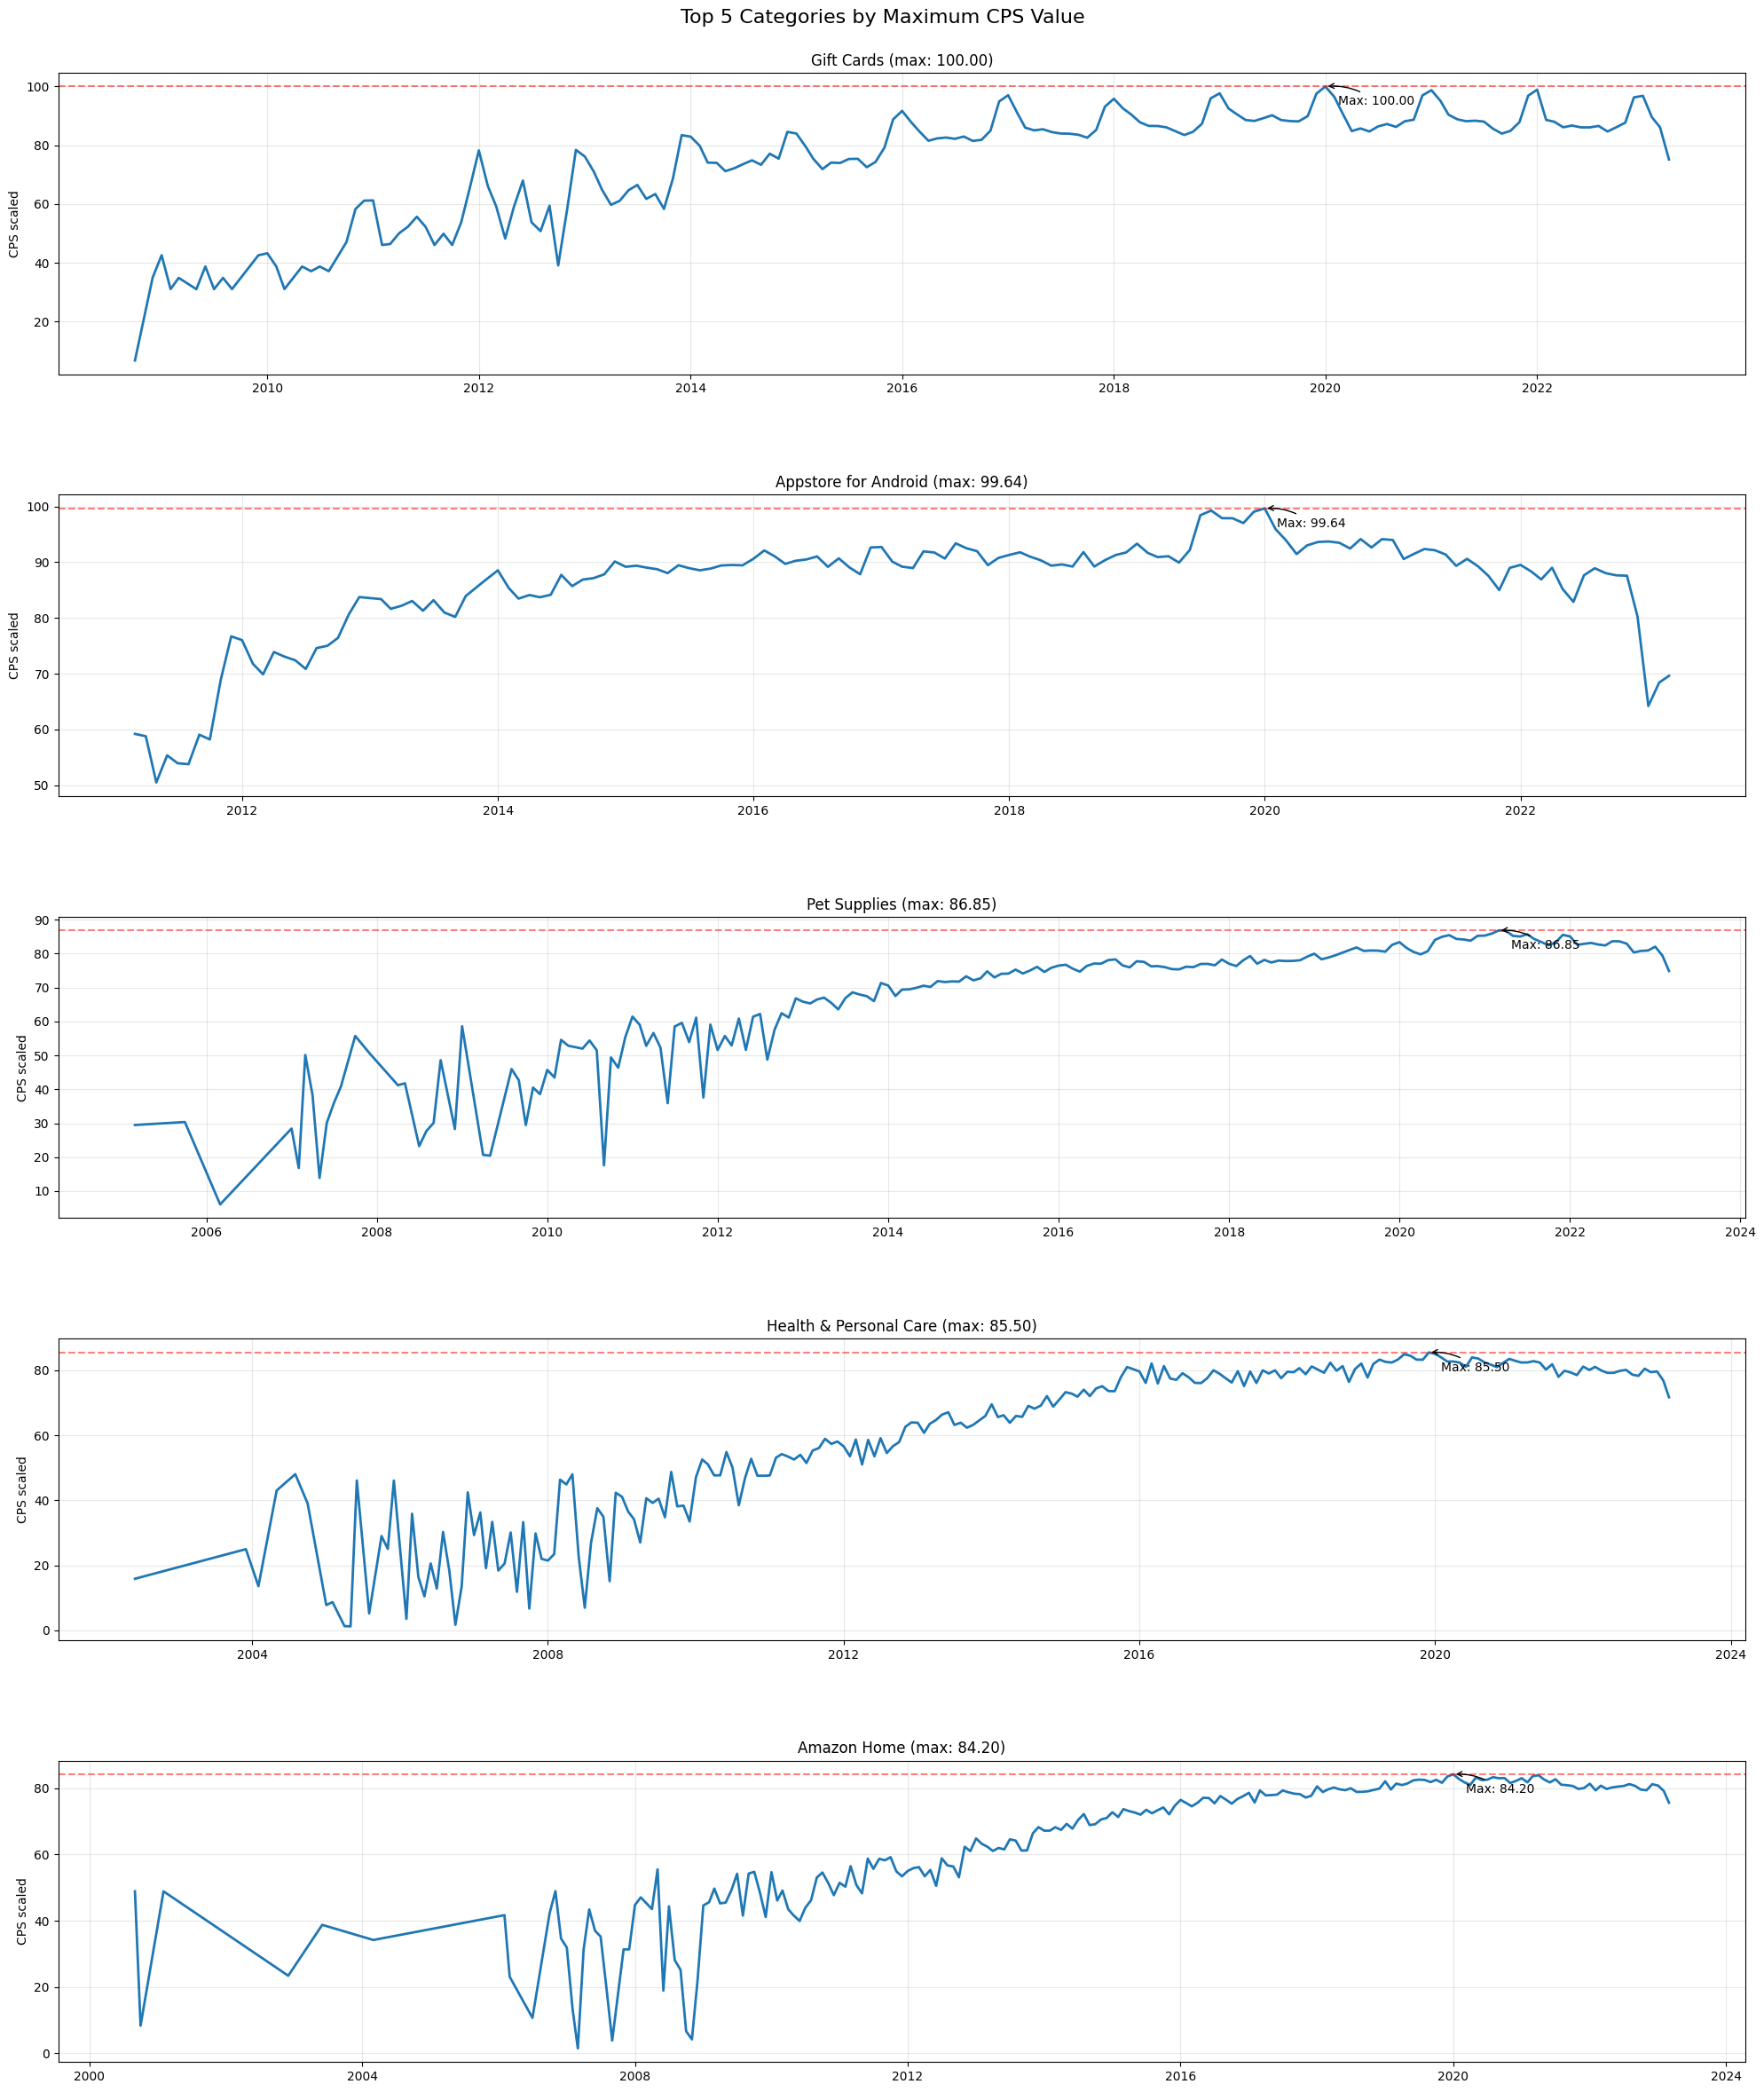

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get the top 5 categories by maximum CPS value
max_cps_by_category = cps_summary.groupby('category')['CPS scaled'].max().sort_values(ascending=False)
top_categories = max_cps_by_category.head(5).index.tolist()

# Create a figure with 5 subplots (one for each category)
fig, axes = plt.subplots(5, 1, figsize=(20, 24), sharex=False)
fig.suptitle('Top 5 Categories by Maximum CPS Value', fontsize=16)

# Plot each category in its own subplot
for i, category in enumerate(top_categories):
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    axes[i].plot(category_subset['date'], category_subset['CPS scaled'], 
                 linestyle='-', linewidth=2)
    
    # Add horizontal line for the maximum value
    max_value = max_cps_by_category[category]
    axes[i].axhline(y=max_value, color='r', linestyle='--', alpha=0.5)
    
    # Set category title and y label
    axes[i].set_title(f"{category} (max: {max_value:.2f})")
    axes[i].set_ylabel('CPS scaled')
    axes[i].grid(True, alpha=0.3)
    
    # Find the date of maximum CPS for annotation
    max_date = category_subset.loc[category_subset['CPS scaled'].idxmax(), 'date']
    axes[i].annotate(f"Max: {max_value:.2f}",
                    xy=(max_date, max_value),
                    xytext=(10, -15),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Set common figure properties
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Increased spacing between subplots
plt.show()

## Top 5 categories by greatest growth

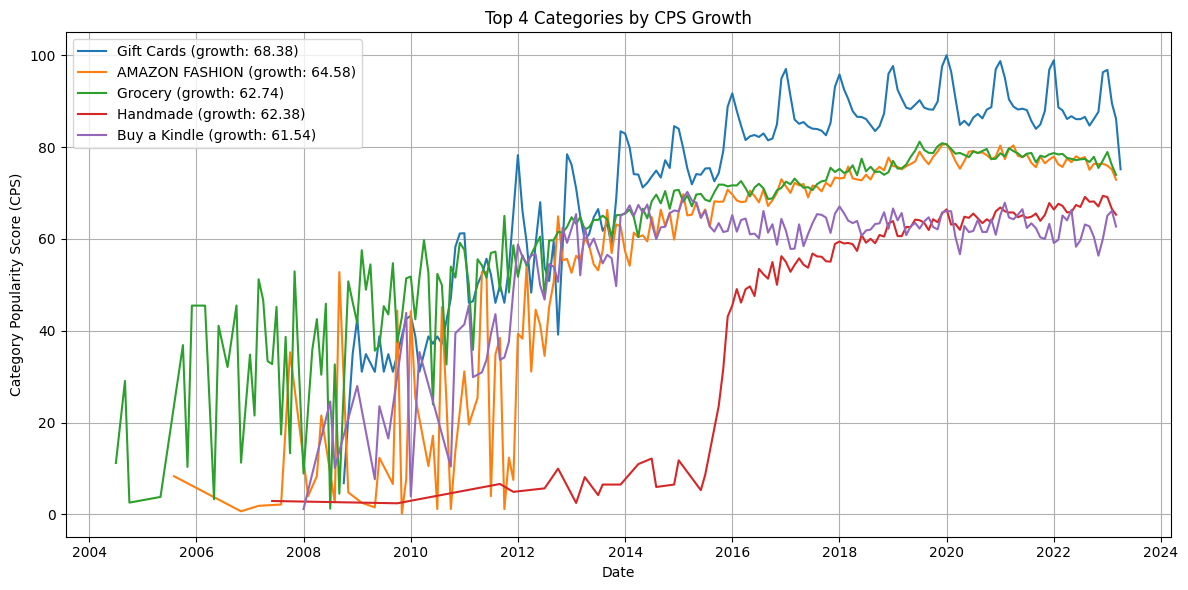

In [7]:
growth_by_category = {}
    
for category in cps_summary['category'].unique():
    category_data = cps_summary[cps_summary['category'] == category].sort_values(['year', 'month'])
    if len(category_data) >= 2:  # Need at least 2 data points to calculate growth
        first_cps = category_data['CPS scaled'].iloc[0]
        last_cps = category_data['CPS scaled'].iloc[-1]
        growth = last_cps - first_cps
        growth_by_category[category] = growth

# Get top 4 categories by growth
top_growth_categories = sorted(growth_by_category.items(), key=lambda x: x[1], reverse=True)[:5]
top_categories = [cat for cat, _ in top_growth_categories]

plt.figure(figsize=(12, 6))
for category in top_categories:
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    plt.plot(category_subset['date'], category_subset['CPS scaled'], 
                label=f"{category} (growth: {growth_by_category[category]:.2f})")

plt.xlabel('Date')
plt.ylabel('Category Popularity Score (CPS)')
plt.title('Top 4 Categories by CPS Growth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

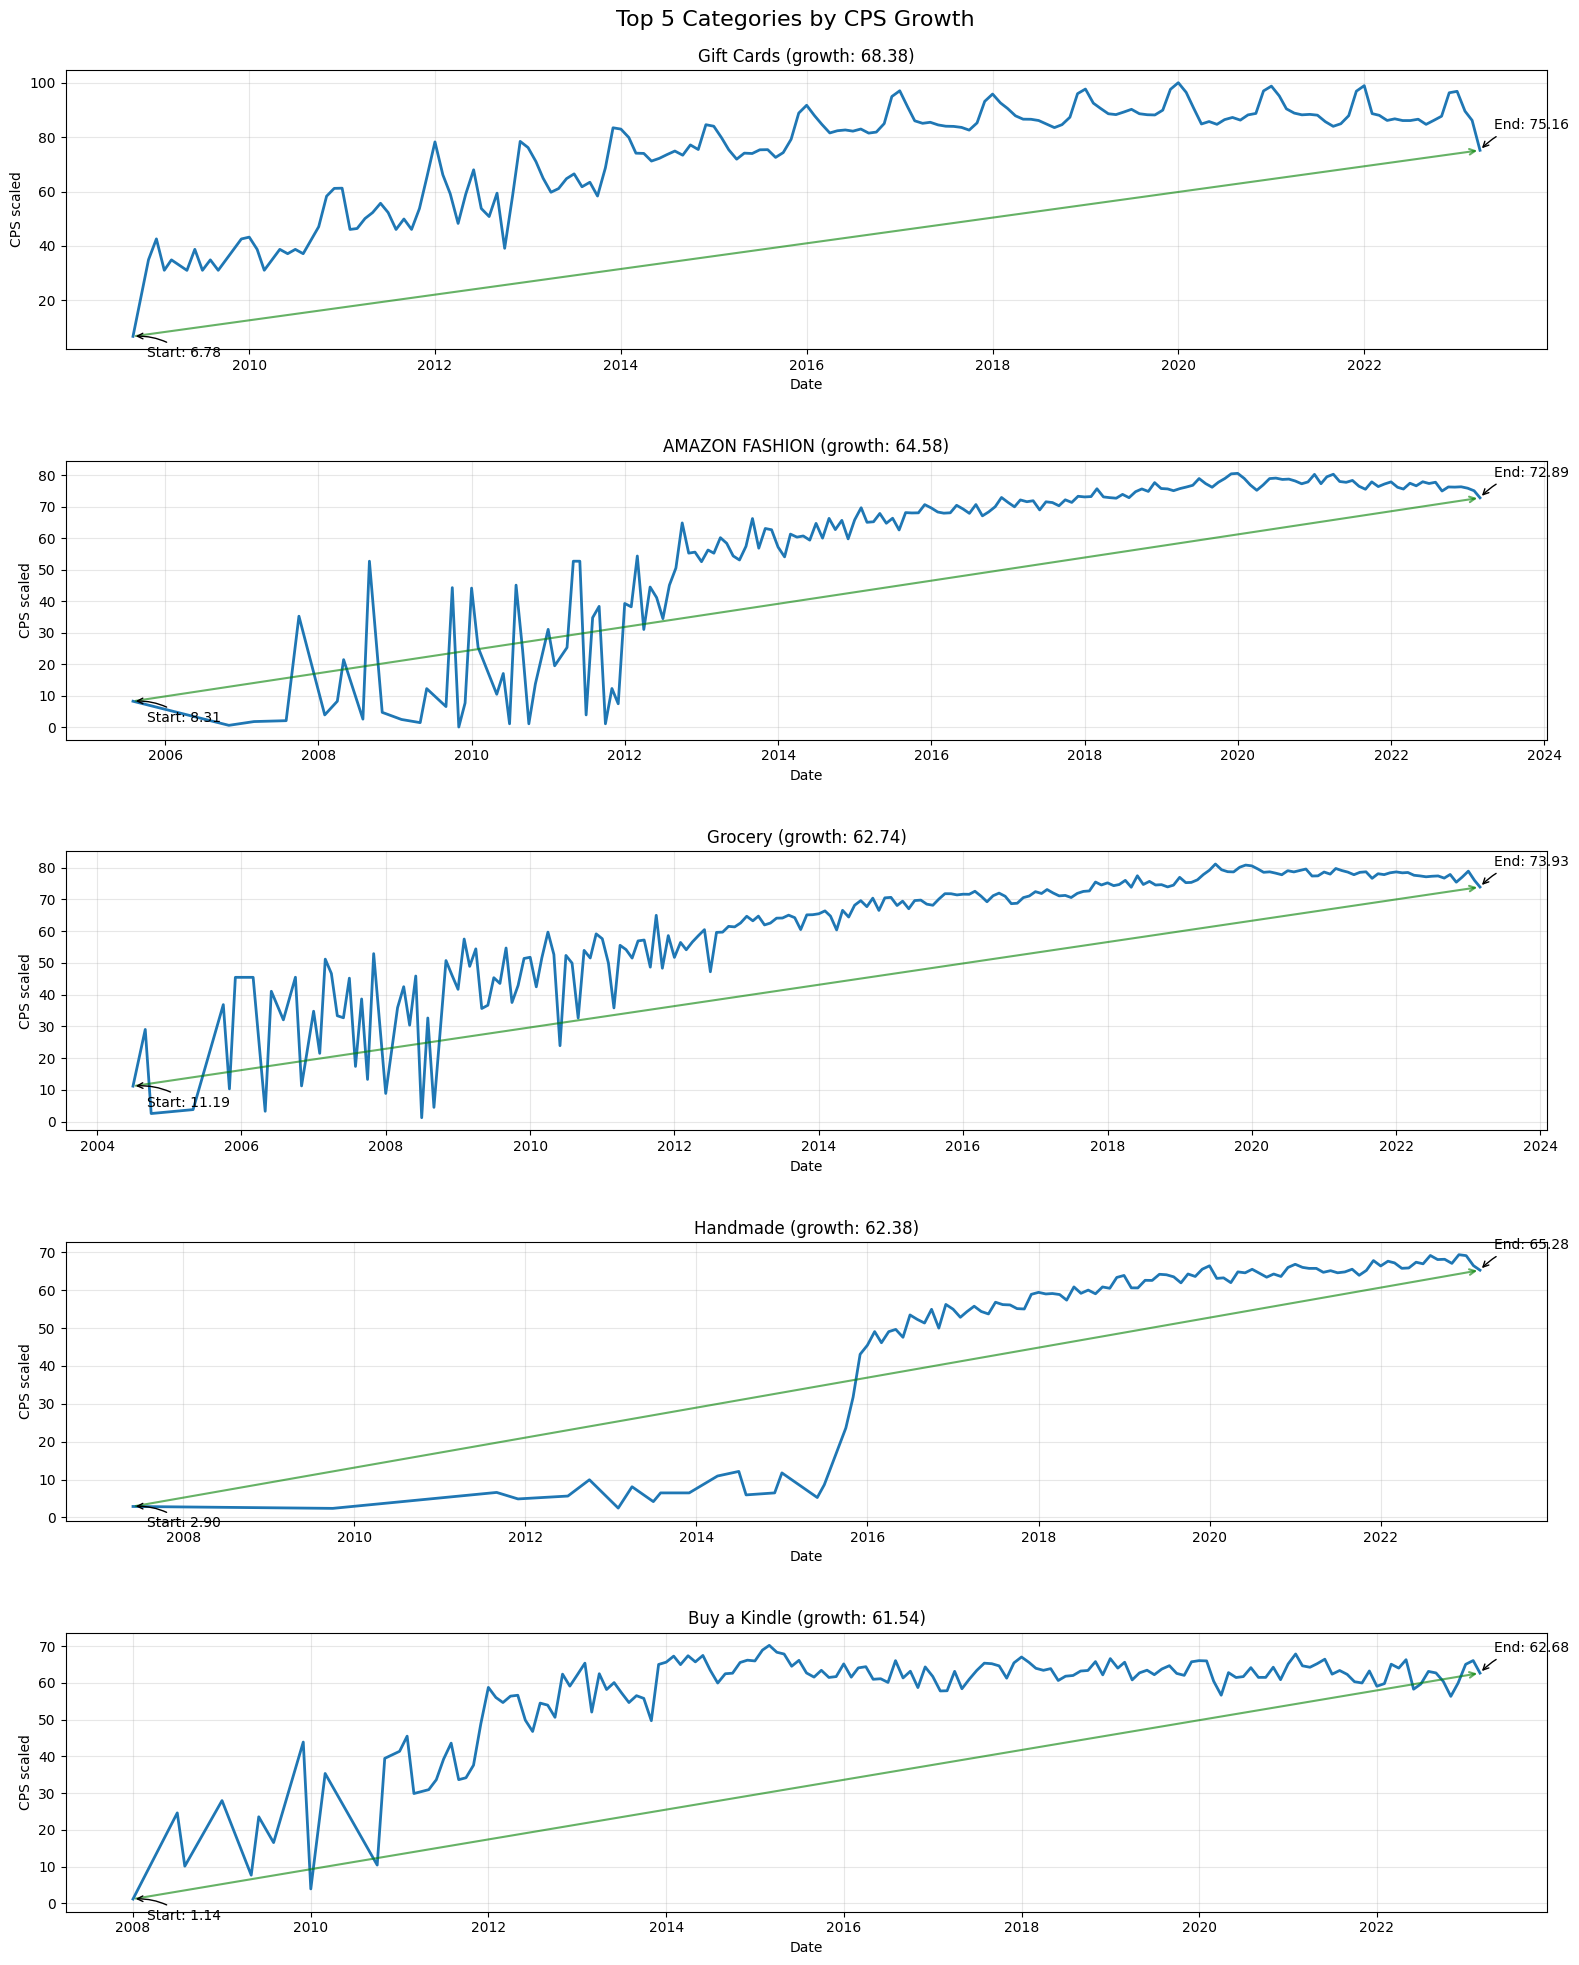

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate growth for each category
growth_by_category = {}
    
for category in cps_summary['category'].unique():
    category_data = cps_summary[cps_summary['category'] == category].sort_values(['year', 'month'])
    if len(category_data) >= 2:  # Need at least 2 data points to calculate growth
        first_cps = category_data['CPS scaled'].iloc[0]
        last_cps = category_data['CPS scaled'].iloc[-1]
        growth = last_cps - first_cps
        growth_by_category[category] = growth

# Get top 5 categories by growth
top_growth_categories = sorted(growth_by_category.items(), key=lambda x: x[1], reverse=True)[:5]
top_categories = [cat for cat, _ in top_growth_categories]

# Create a figure with 5 subplots (one for each category)
fig, axes = plt.subplots(5, 1, figsize=(16, 20), sharex=False)
fig.suptitle('Top 5 Categories by CPS Growth', fontsize=16)

# Plot each category in its own subplot
for i, category in enumerate(top_categories):
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    axes[i].plot(category_subset['date'], category_subset['CPS scaled'], 
                 linestyle='-', linewidth=2)
    
    # Show the growth with a line from first to last point
    first_date = category_subset['date'].iloc[0]
    last_date = category_subset['date'].iloc[-1]
    first_cps = category_subset['CPS scaled'].iloc[0]
    last_cps = category_subset['CPS scaled'].iloc[-1]
    
    # Add a subtle arrow showing the growth
    axes[i].annotate("", 
                    xy=(last_date, last_cps), 
                    xytext=(first_date, first_cps),
                    arrowprops=dict(arrowstyle="->", color="green", lw=1.5, alpha=0.6),
                    annotation_clip=False)
    
    # Set category title and labels
    growth = growth_by_category[category]
    axes[i].set_title(f"{category} (growth: {growth:.2f})")
    axes[i].set_ylabel('CPS scaled')
    axes[i].set_xlabel('Date')  # Add x-label to each subplot
    axes[i].grid(True, alpha=0.3)
    
    # Annotate the first and last points
    axes[i].annotate(f"Start: {first_cps:.2f}",
                    xy=(first_date, first_cps),
                    xytext=(10, -15),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    axes[i].annotate(f"End: {last_cps:.2f}",
                    xy=(last_date, last_cps),
                    xytext=(10, 15),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Set common figure properties
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Increased spacing between subplots
plt.show()

## Small multiples - show individual plots for top categories
Overall Patterns

Long-term Growth Trend: All five categories show a strong upward trajectory from early 2000s to around 2020-2022, with CPS values generally increasing from low values (0-20) to high values (70-80).
Recent Plateau/Decline: Interestingly, all categories show a slight decline or plateau after reaching their peaks around 2020-2022, suggesting a potential market correction or saturation.
Two Distinct Phases: Most categories exhibit an early phase of high volatility and lower values (2000-2014), followed by a more stable growth phase with higher values (2015-2023).

Category-Specific Insights

Amazon Fashion (highest volatility, std: 24.85):

Shows extreme volatility in the early period (2005-2012) with dramatic spikes and drops
Most unstable pricing among all categories
Stabilized significantly after 2014, showing steady growth thereafter
Peak CPS around 2020-2021


Health & Personal Care (std: 23.29):

Second most volatile category
Shows erratic behavior in early years similar to Amazon Fashion
Reached peak values slightly later than other categories
More jagged fluctuations throughout its growth phase compared to others


Handmade (std: 21.59):

Shows the most dramatic shift in the dataset
Had minimal data and low CPS values until around 2014-2015
Then experienced an extremely steep rise
This suggests this might be a newer category that was established or tracked later than others


All Electronics (std: 20.98):

Shows consistent volatility throughout the timeline
Has more frequent small ups and downs even during its growth phase
Technology pricing tends to fluctuate based on release cycles and market competition


All Beauty (std: 20.61):

Shows similar patterns to Amazon Fashion and Health & Personal Care
Relatively high early volatility that stabilizes into steady growth
Peaks around the same time as other categories (2020-2022)



Key Observations

Synchronous Peaks: All five categories reached their maximum CPS values around the same time period (2020-2022), suggesting a broader market factor affecting all categories simultaneously (possibly pandemic-related consumer behavior).
Consistent Low Points: The minimum values for most categories occurred in the early time periods (2005-2007), indicating either initial market entry or data collection differences.
Volatility Reduction: All categories show significantly reduced volatility after 2015, suggesting market maturation or improved pricing strategies.
Potential COVID Impact: The data appears to show peaks during the COVID-19 pandemic period (2020-2022), which aligns with known increases in e-commerce activity during lockdowns.
Category Emergence: The Handmade category shows a distinct pattern that suggests it was introduced to the platform much later than other categories, with minimal data before 2014-2015.


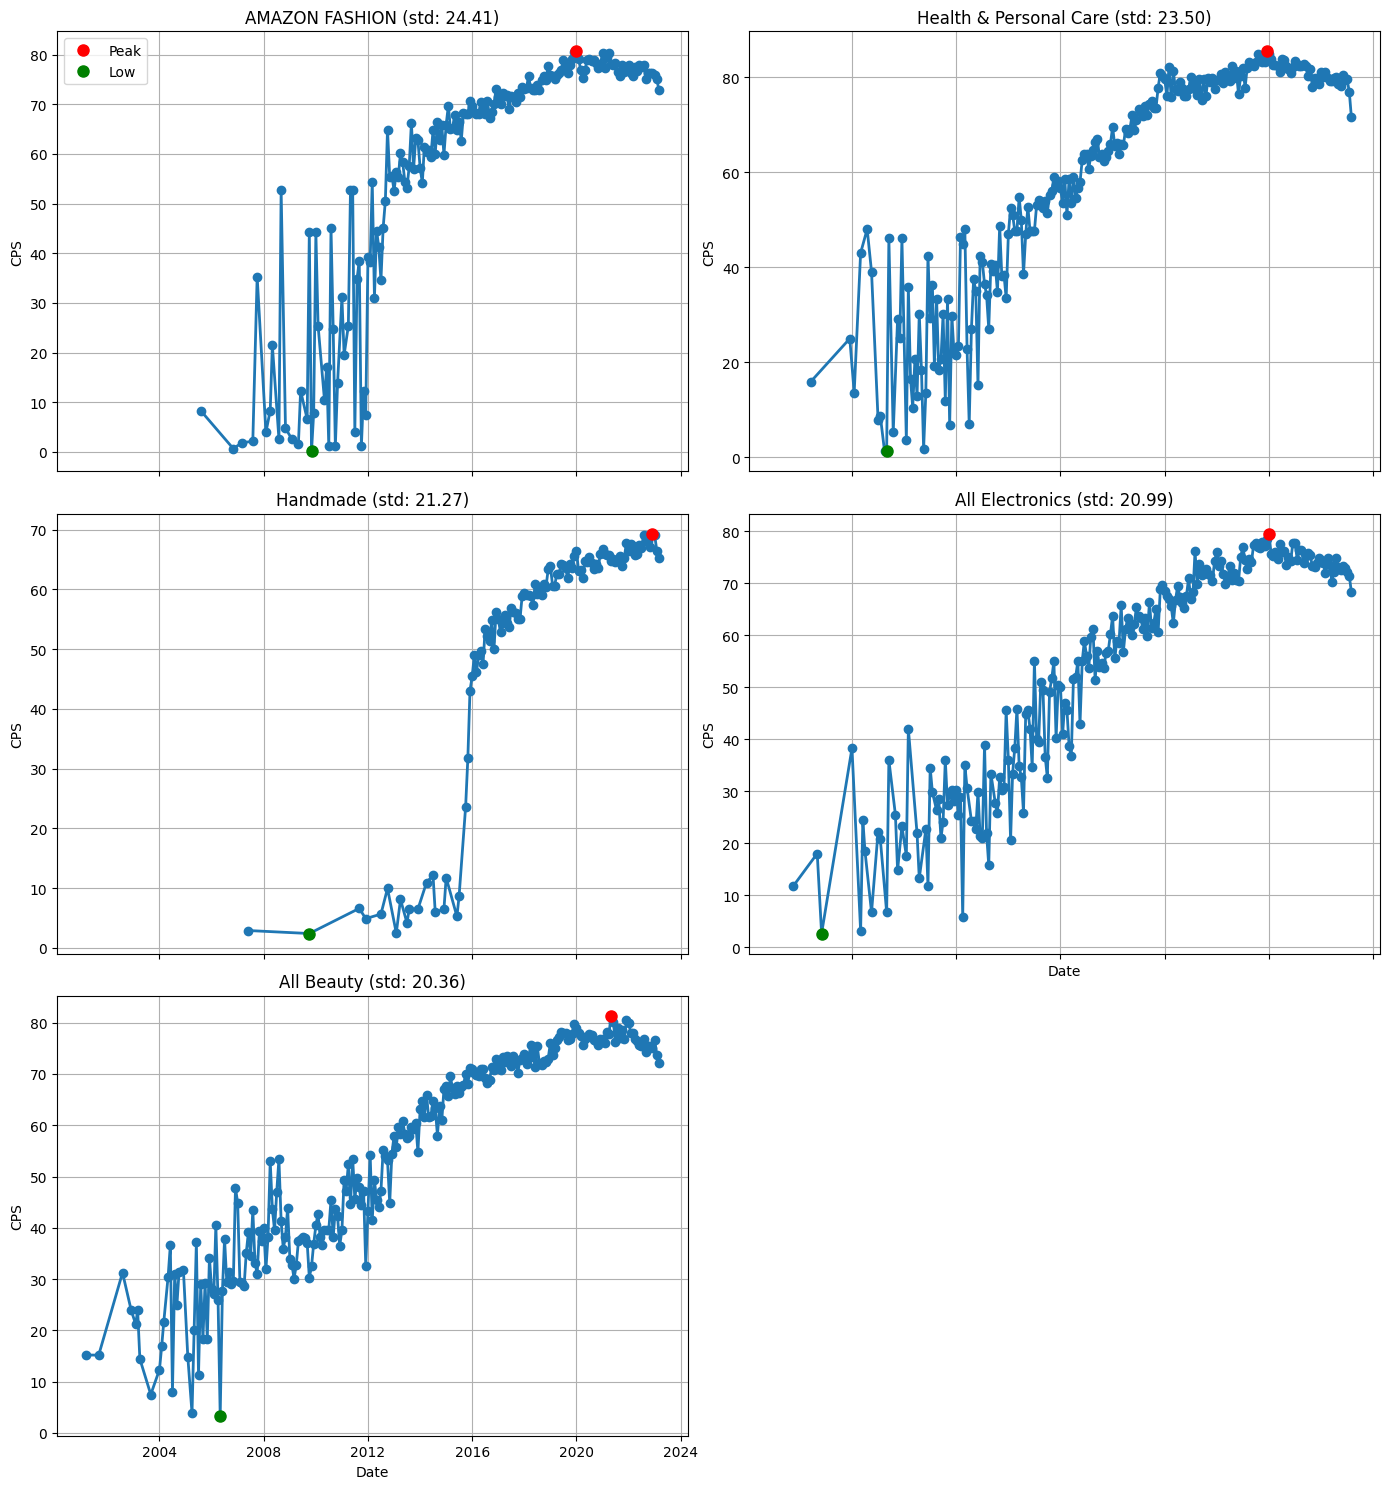

In [9]:
category_fluctuations = {}
for category in cps_summary['category'].unique():
    category_subset = cps_summary[cps_summary['category'] == category]
    fluctuation = category_subset['CPS scaled'].std()
    category_fluctuations[category] = fluctuation

# Get top 5 categories
top_categories = sorted(category_fluctuations.items(), key=lambda x: x[1], reverse=True)[:5]
top_category_names = [cat for cat, _ in top_categories]

# Create a 3x2 grid of subplots (6 total, we'll use 5)
fig, axes = plt.subplots(3, 2, figsize=(14, 15), sharex=True)
axes = axes.flatten()

for i, category in enumerate(top_category_names):
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    axes[i].plot(category_subset['date'], category_subset['CPS scaled'], 
                marker='o', linestyle='-', linewidth=2)
    axes[i].set_title(f"{category} (std: {category_fluctuations[category]:.2f})")
    axes[i].set_ylabel('CPS')
    axes[i].grid(True)
    
    # Highlight min and max points
    max_idx = category_subset['CPS scaled'].idxmax()
    min_idx = category_subset['CPS scaled'].idxmin()
    
    axes[i].plot(category_subset.loc[max_idx, 'date'], 
                category_subset.loc[max_idx, 'CPS scaled'], 
                'ro', markersize=8, label='Peak')
    
    axes[i].plot(category_subset.loc[min_idx, 'date'], 
                category_subset.loc[min_idx, 'CPS scaled'], 
                'go', markersize=8, label='Low')
    
    if i >= 3:  # Only add x-label to bottom row plots
        axes[i].set_xlabel('Date')
        
    if i == 0:  # Only add legend to first plot
        axes[i].legend()

# Hide the unused subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

# Using BPCPS

## Top 5 brands within a category over time

In [10]:
bpcps_summary.head(3)

,Unnamed: 0,category,brand,year,month,BPCPS,BPCPS scaled
0,80006,AMAZON FASHION,aamilife,2017,12,1.081805,2.271731
1,80005,AMAZON FASHION,aamilife,2018,4,3.031341,12.969987
2,80007,AMAZON FASHION,aamilife,2019,5,1.589235,5.056300


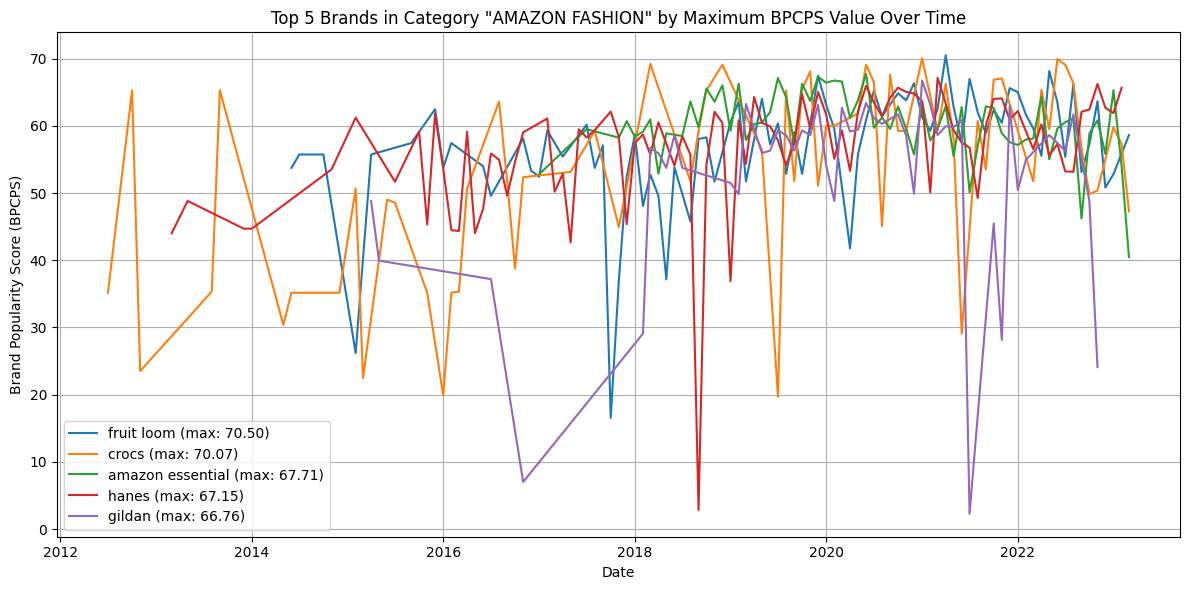

In [14]:
selected_category = 'AMAZON FASHION'
# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()
# Find max CPS scaled per brand within the category
top_brands = category_df.groupby('brand')['BPCPS scaled'].max().nlargest(5).index.tolist()
plt.figure(figsize=(12, 6))
for brand in top_brands:
    brand_df = category_df[category_df['brand'] == brand].copy()
    # Convert year and month to datetime
    brand_df['date'] = pd.to_datetime(brand_df[['year', 'month']].assign(day=1))
    brand_df = brand_df.sort_values('date')
    plt.plot(brand_df['date'], brand_df['BPCPS scaled'], label=f"{brand} (max: {brand_df['BPCPS scaled'].max():.2f})")
plt.xlabel('Date')
plt.ylabel('Brand Popularity Score (BPCPS)')
plt.title(f'Top 5 Brands in Category "{selected_category}" by Maximum BPCPS Value Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

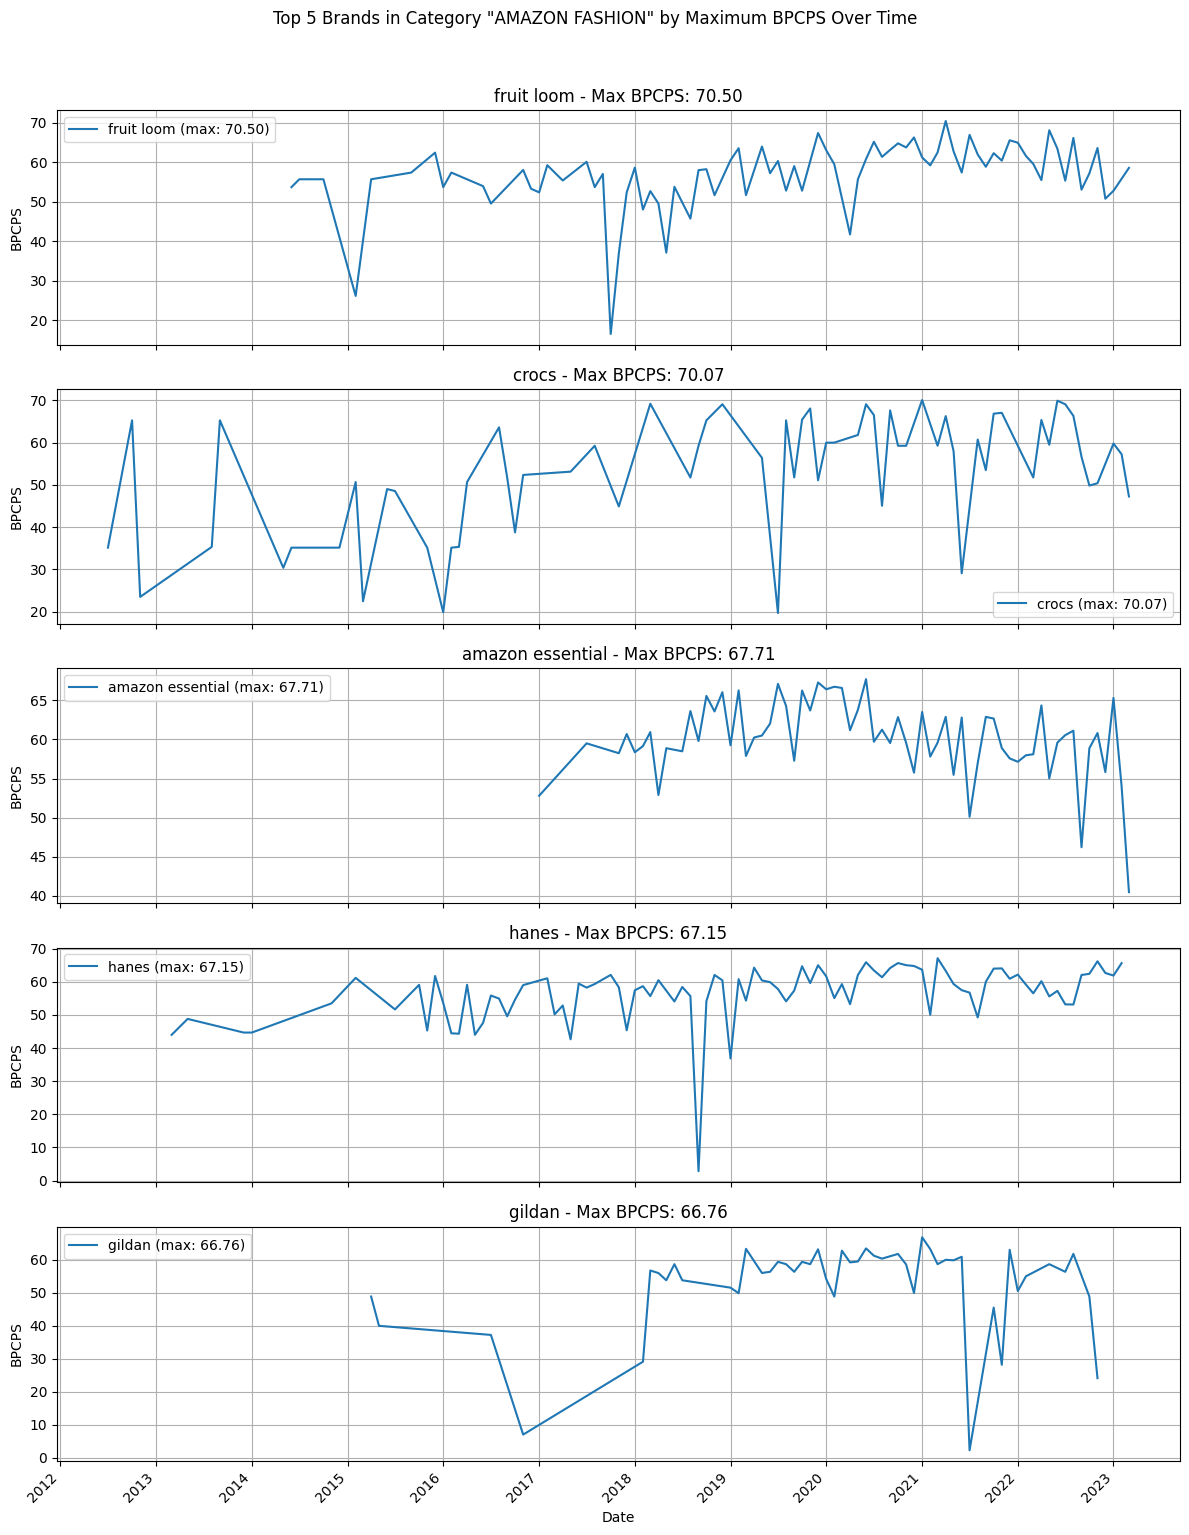

In [20]:
selected_category = 'AMAZON FASHION'

# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()

# Find max CPS scaled per brand within the category
top_brands = category_df.groupby('brand')['BPCPS scaled'].max().nlargest(5).index.tolist()

fig, axs = plt.subplots(len(top_brands), 1, figsize=(12, 3 * len(top_brands)), sharex=True)

for i, brand in enumerate(top_brands):
    brand_df = category_df[category_df['brand'] == brand].copy()
    # Convert year and month to datetime
    brand_df['date'] = pd.to_datetime(brand_df[['year', 'month']].assign(day=1))
    brand_df = brand_df.sort_values('date')
    axs[i].plot(brand_df['date'], brand_df['BPCPS scaled'], label=f"{brand} (max: {brand_df['BPCPS scaled'].max():.2f})")
    axs[i].set_ylabel('BPCPS')
    axs[i].set_title(f"{brand} - Max BPCPS: {brand_df['BPCPS scaled'].max():.2f}")
    axs[i].grid(True)
    axs[i].legend()
    # Set major ticks to yearly intervals
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Rotate year labels for readability
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

axs[-1].set_xlabel('Date')

plt.suptitle(f'Top 5 Brands in Category "{selected_category}" by Maximum BPCPS Over Time', y=1.02)
plt.tight_layout()
plt.show()

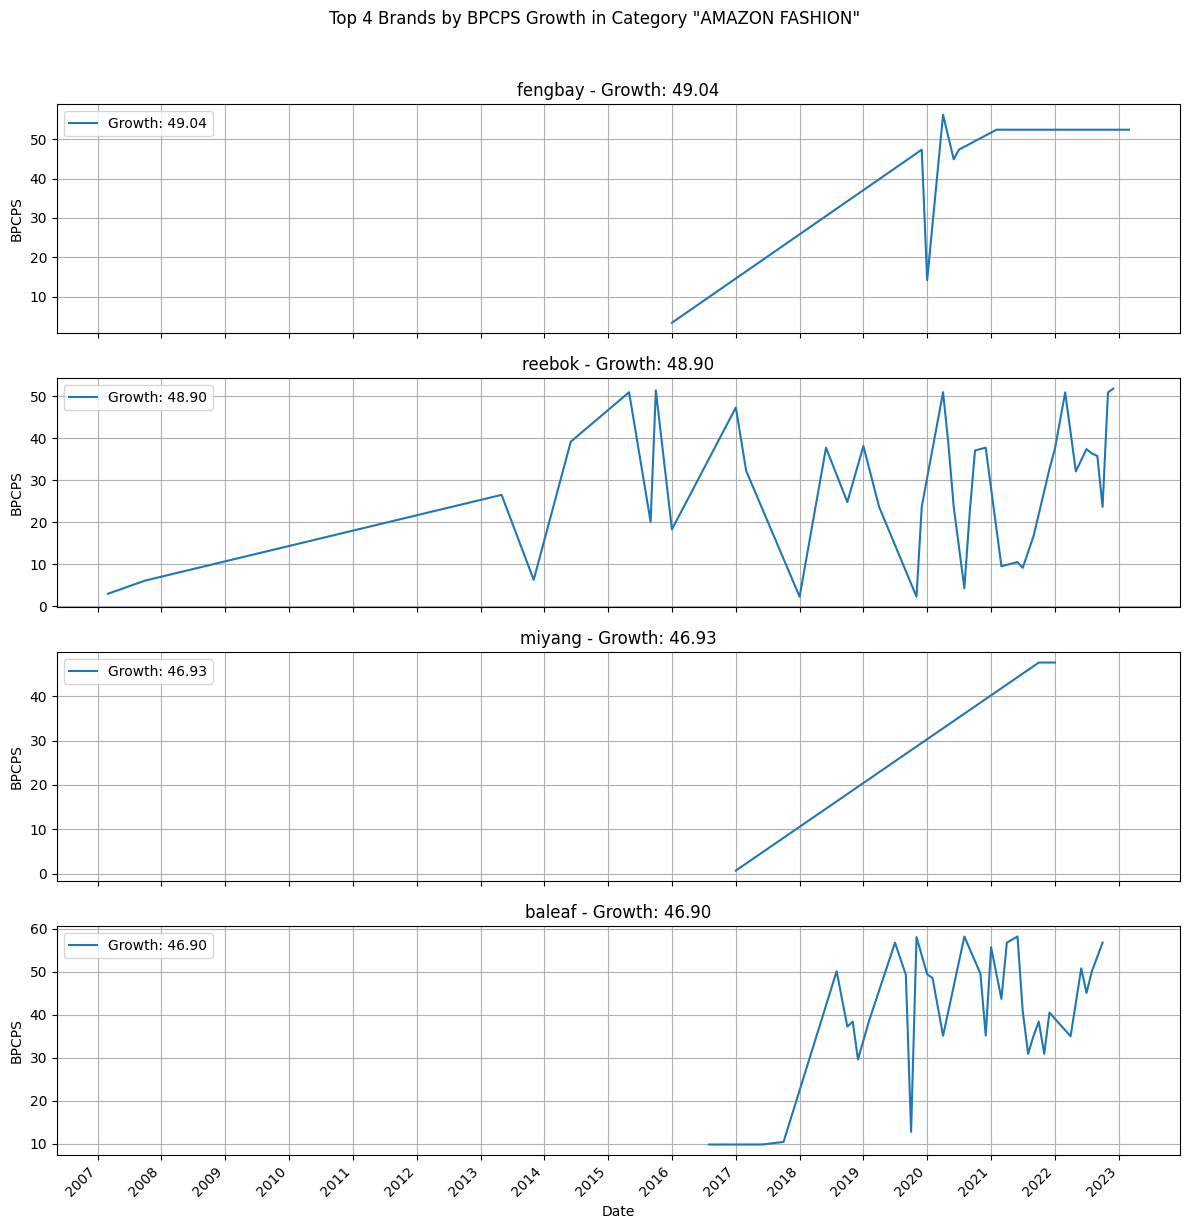

In [23]:
selected_category = 'AMAZON FASHION'

# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()

# Calculate growth for each brand within the selected category
growth_by_brand = {}
for brand in category_df['brand'].unique():
    brand_data = category_df[category_df['brand'] == brand].sort_values(['year', 'month'])
    if len(brand_data) >= 2:
        first_bpcps = brand_data['BPCPS scaled'].iloc[0]
        last_bpcps = brand_data['BPCPS scaled'].iloc[-1]
        growth = last_bpcps - first_bpcps
        growth_by_brand[brand] = growth

# Get top 4 brands by growth
top_growth_brands = sorted(growth_by_brand.items(), key=lambda x: x[1], reverse=True)[:4]
top_brands = [brand for brand, _ in top_growth_brands]

fig, axs = plt.subplots(len(top_brands), 1, figsize=(12, 3 * len(top_brands)), sharex=True)

for i, brand in enumerate(top_brands):
    brand_subset = category_df[category_df['brand'] == brand].copy()
    brand_subset['date'] = pd.to_datetime(brand_subset[['year', 'month']].assign(day=1))
    brand_subset = brand_subset.sort_values('date')
    axs[i].plot(brand_subset['date'], brand_subset['BPCPS scaled'], label=f"Growth: {growth_by_brand[brand]:.2f}", marker=None)
    axs[i].set_ylabel('BPCPS')
    axs[i].set_title(f"{brand} - Growth: {growth_by_brand[brand]:.2f}")
    axs[i].grid(True)
    axs[i].legend()
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

axs[-1].set_xlabel('Date')
plt.suptitle(f'Top 4 Brands by BPCPS Growth in Category "{selected_category}"', y=1.02)
plt.tight_layout()
plt.show()

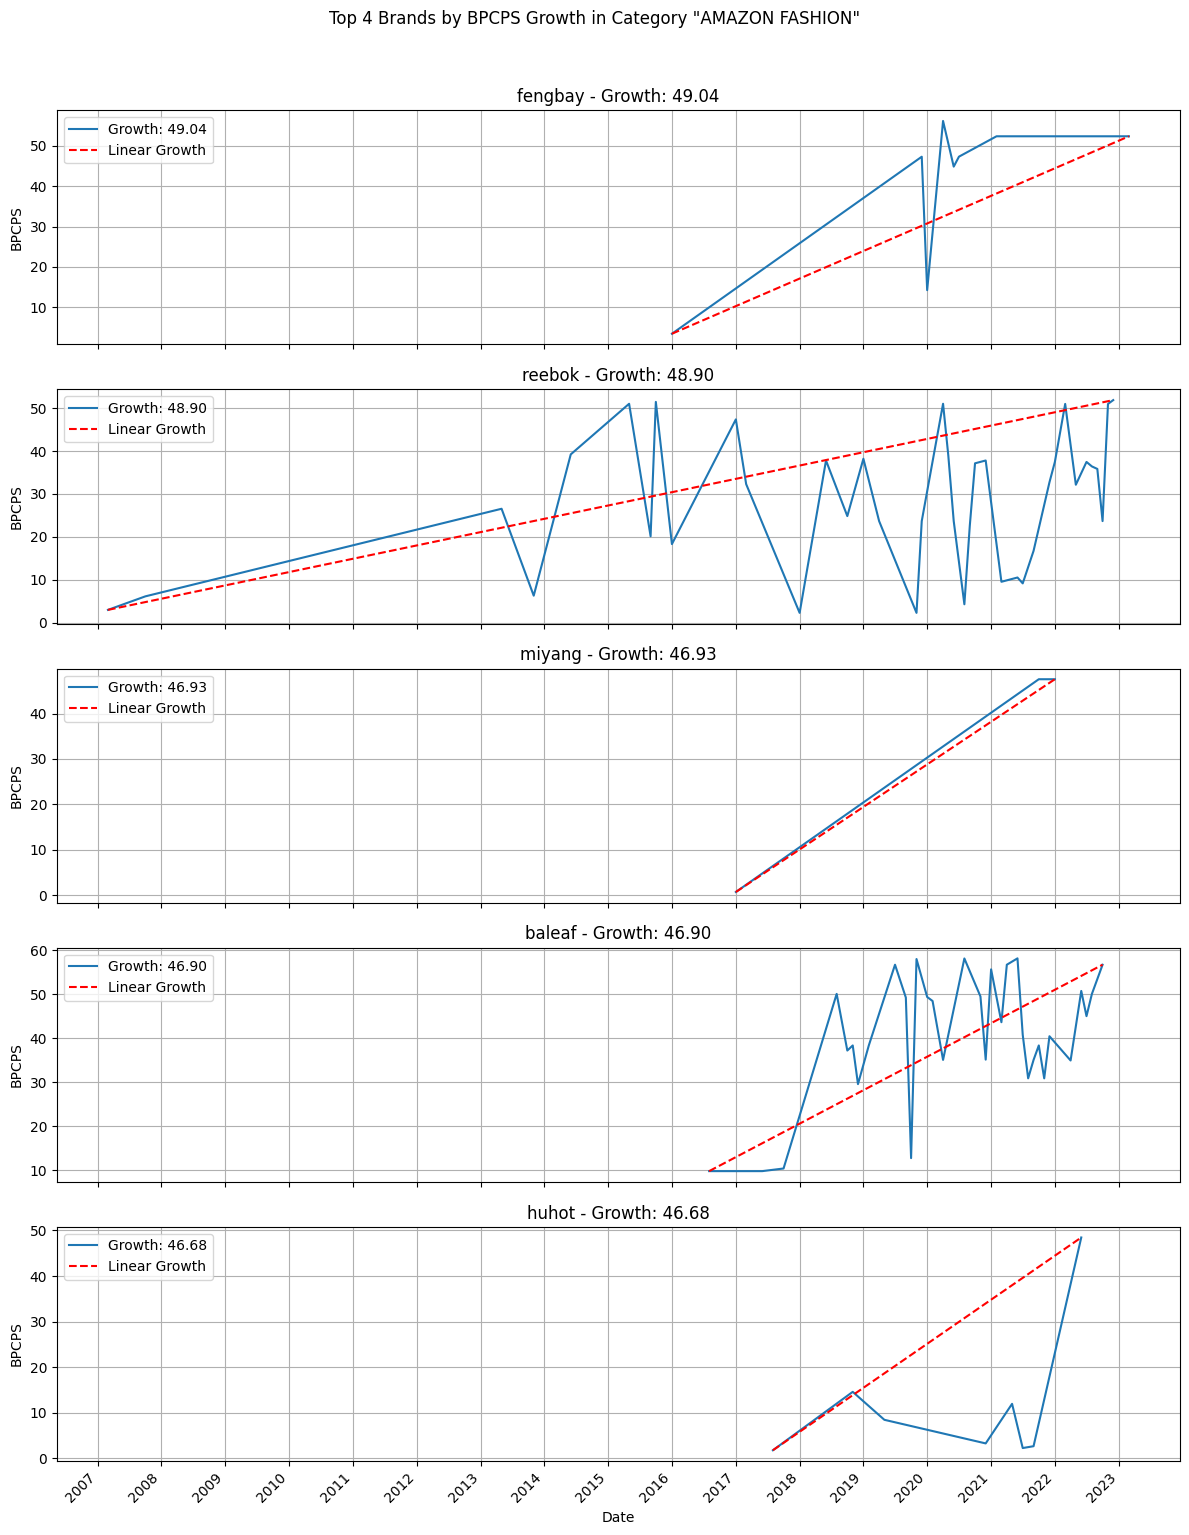

In [ ]:
selected_category = 'AMAZON FASHION'
# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()
growth_by_brand = {}
for brand in category_df['brand'].unique():
    brand_data = category_df[category_df['brand'] == brand].sort_values(['year', 'month'])
    
    if len(brand_data) >= 2:
        first_bpcps = brand_data['BPCPS scaled'].iloc[0]
        last_bpcps = brand_data['BPCPS scaled'].iloc[-1]
        growth = last_bpcps - first_bpcps
        growth_by_brand[brand] = growth

# Get top 4 brands by growth
top_growth_brands = sorted(growth_by_brand.items(), key=lambda x: x[1], reverse=True)[:5]
top_brands = [brand for brand, _ in top_growth_brands]
fig, axs = plt.subplots(len(top_brands), 1, figsize=(12, 3 * len(top_brands)), sharex=True)
for i, brand in enumerate(top_brands):
    brand_subset = category_df[category_df['brand'] == brand].copy()
    brand_subset['date'] = pd.to_datetime(brand_subset[['year', 'month']].assign(day=1))
    brand_subset = brand_subset.sort_values('date')
    # Plot actual BPCPS scaled time series without markers
    axs[i].plot(brand_subset['date'], brand_subset['BPCPS scaled'], label=f"Growth: {growth_by_brand[brand]:.2f}", marker=None)
    # Line from first to last point
    dates_num = mdates.date2num(brand_subset['date'])
    x_vals = [dates_num[0], dates_num[-1]]
    y_vals = [brand_subset['BPCPS scaled'].iloc[0], brand_subset['BPCPS scaled'].iloc[-1]]
    axs[i].plot(x_vals, y_vals, linestyle='--', color='red', label='Linear Growth')
    axs[i].set_ylabel('BPCPS')
    axs[i].set_title(f"{brand} - Growth: {growth_by_brand[brand]:.2f}")
    axs[i].grid(True)
    axs[i].legend()

    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')
axs[-1].set_xlabel('Date')
plt.suptitle(f'Top 5 Brands by BPCPS Growth in Category "{selected_category}"', y=1.02)
plt.tight_layout()
plt.show()